In [1]:
# Importing all the calculation and visualization libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = (250)
import seaborn as sns
sns.set_theme( style='darkgrid', palette='deep')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load the dataset for analysis using pandas.
df = pd.read_csv('Cardiotocographic.csv')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [3]:
df.describe() # Describes all the descriptive statistics values of numeric columns.

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


### Gains from describing the data:
1. There is missing data in the data set.
2. There is difference between mean and median of the variables showcasing that the outliers  are present but the difference is not to large which indicates that there are not too many extreme values.
3. These outliers can be detected in the further steps and get rid of them.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


## Data Cleaning and Preparation

In [5]:
# To check the missing values and its count.
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

### Duplicates - Searching for duplicate records and deleting them.

In [6]:
df.duplicated().sum()

2

In [7]:
df.drop_duplicates(inplace=True) # Inplace permanently deletes the record.

In [8]:
df.duplicated().sum()

0

### Missing value calculation

In [9]:
#Calculate the percentage of missig values in each column.
for i in df.isna().sum():
    print((i/2124)*100,'%')

# 0 to 5 % missing values: drop rows
# 6 to 45 %: replace the missing values
# 50%: drop column

0.9887005649717515 %
0.9416195856873822 %
0.0 %
0.0 %
0.0 %
0.9887005649717515 %
0.9887005649717515 %
0.0 %
0.0 %
0.0 %
0.9887005649717515 %
0.9887005649717515 %
0.9887005649717515 %
0.9887005649717515 %


In [10]:
# Droping the rows as missing values are between 0 to 5%
df.dropna(inplace = True)

In [11]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


### Outlier detection


<Axes: >

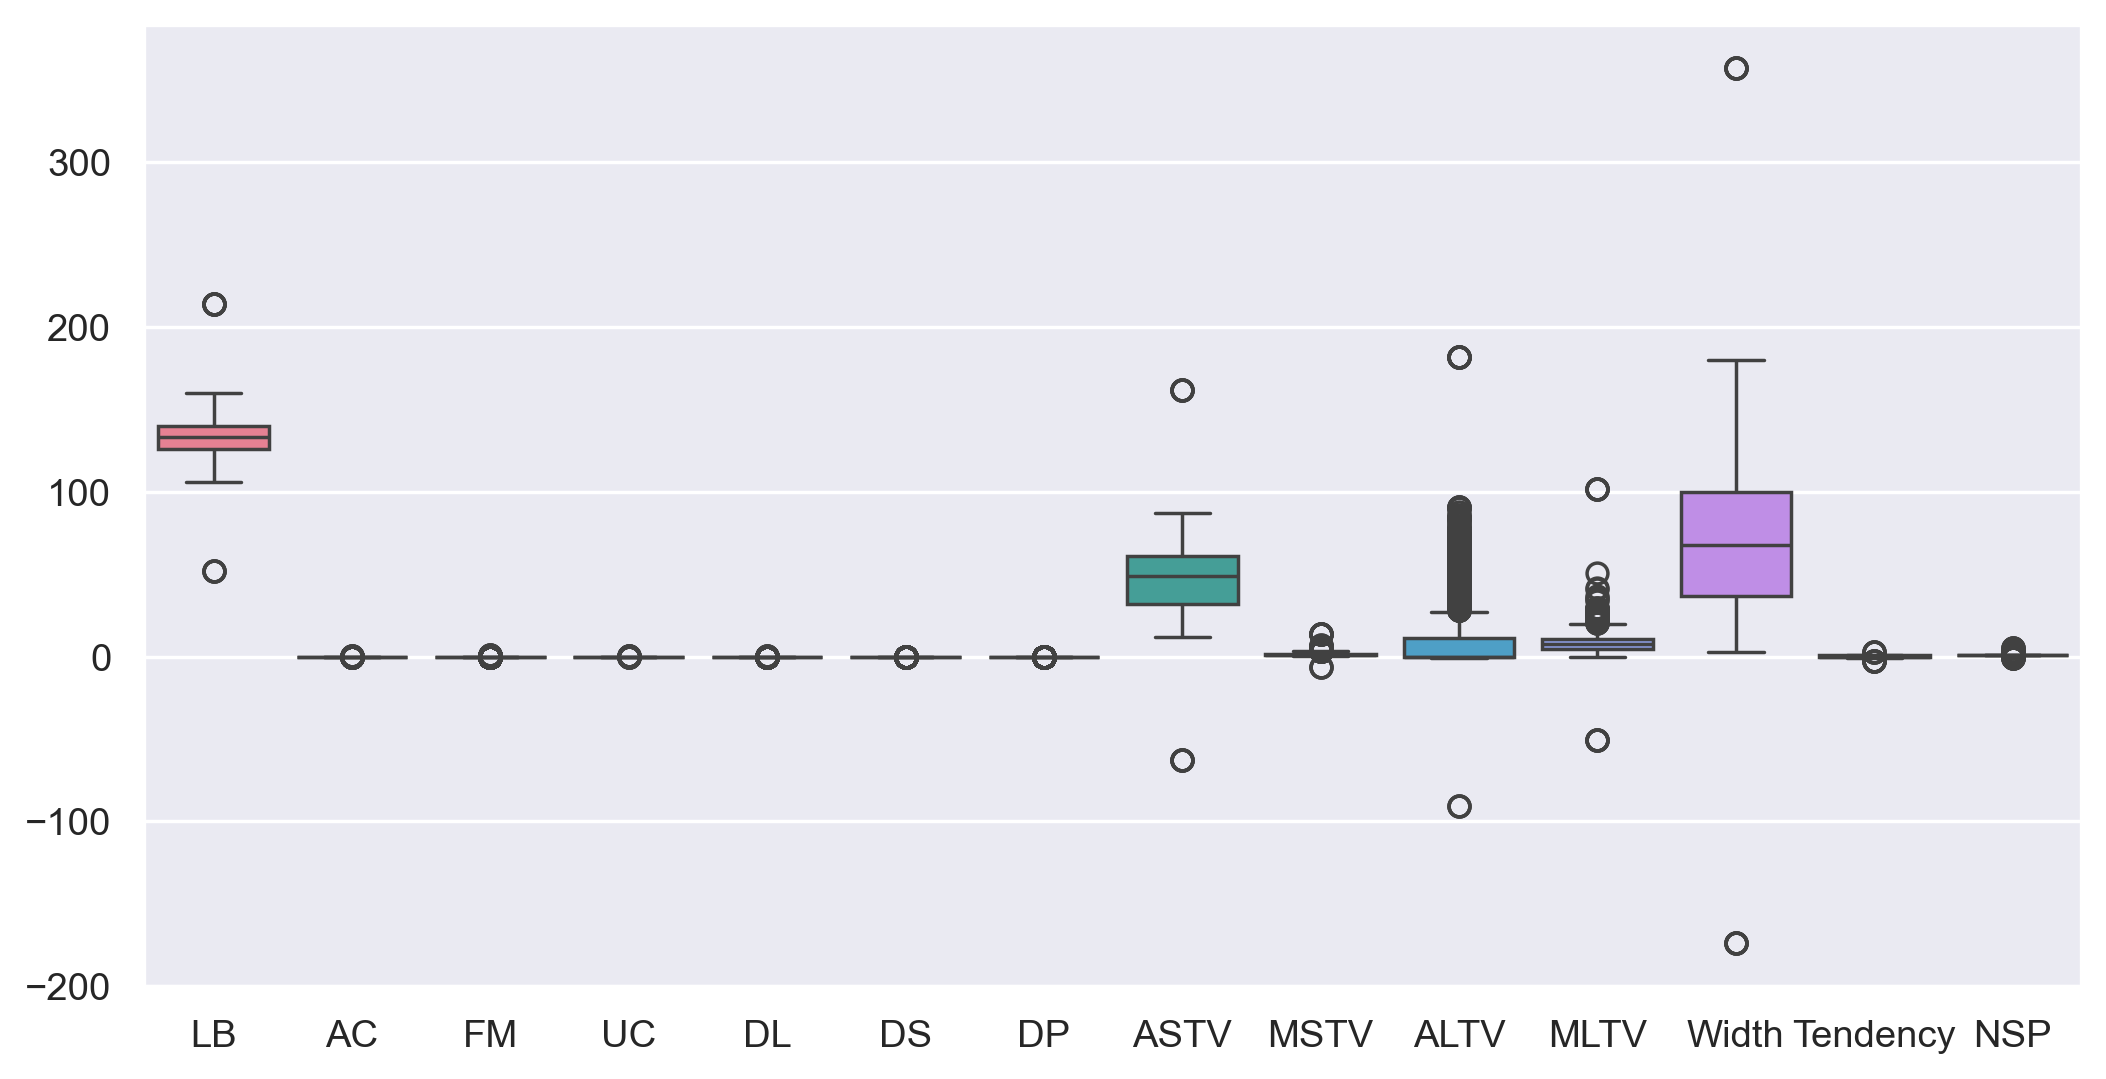

In [12]:
# For outlier detection first plot the boxplot to check the outliers.
sns.boxplot(df)

In [13]:
#Outlier detection function

def outlier_detection(data, cols):
    
    for col in cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [14]:
outlier_detection(df, df.columns)

In [15]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.0,2103.0,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.0
mean,133.291604,0.003144,0.001565,0.004361,0.001770,0.0,0.0,46.999304,1.301912,6.733464,8.017610,70.351685,0.319999,1.0
std,9.976211,0.003844,0.002477,0.003008,0.002675,0.0,0.0,17.633594,0.779896,10.400402,5.094192,39.773195,0.624916,0.0
min,105.000000,-0.008475,-0.003839,-0.005219,-0.004942,0.0,0.0,-11.500000,-0.800000,-16.500000,-4.850000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001631,0.000000,0.004484,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.400000,67.486468,0.000000,1.0
75%,140.000000,0.005650,0.002559,0.006543,0.003295,0.0,0.0,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.0
max,161.000000,0.014124,0.006398,0.013601,0.008237,0.0,0.0,104.500000,3.200000,27.500000,20.350000,194.500000,2.500000,1.0


<Axes: >

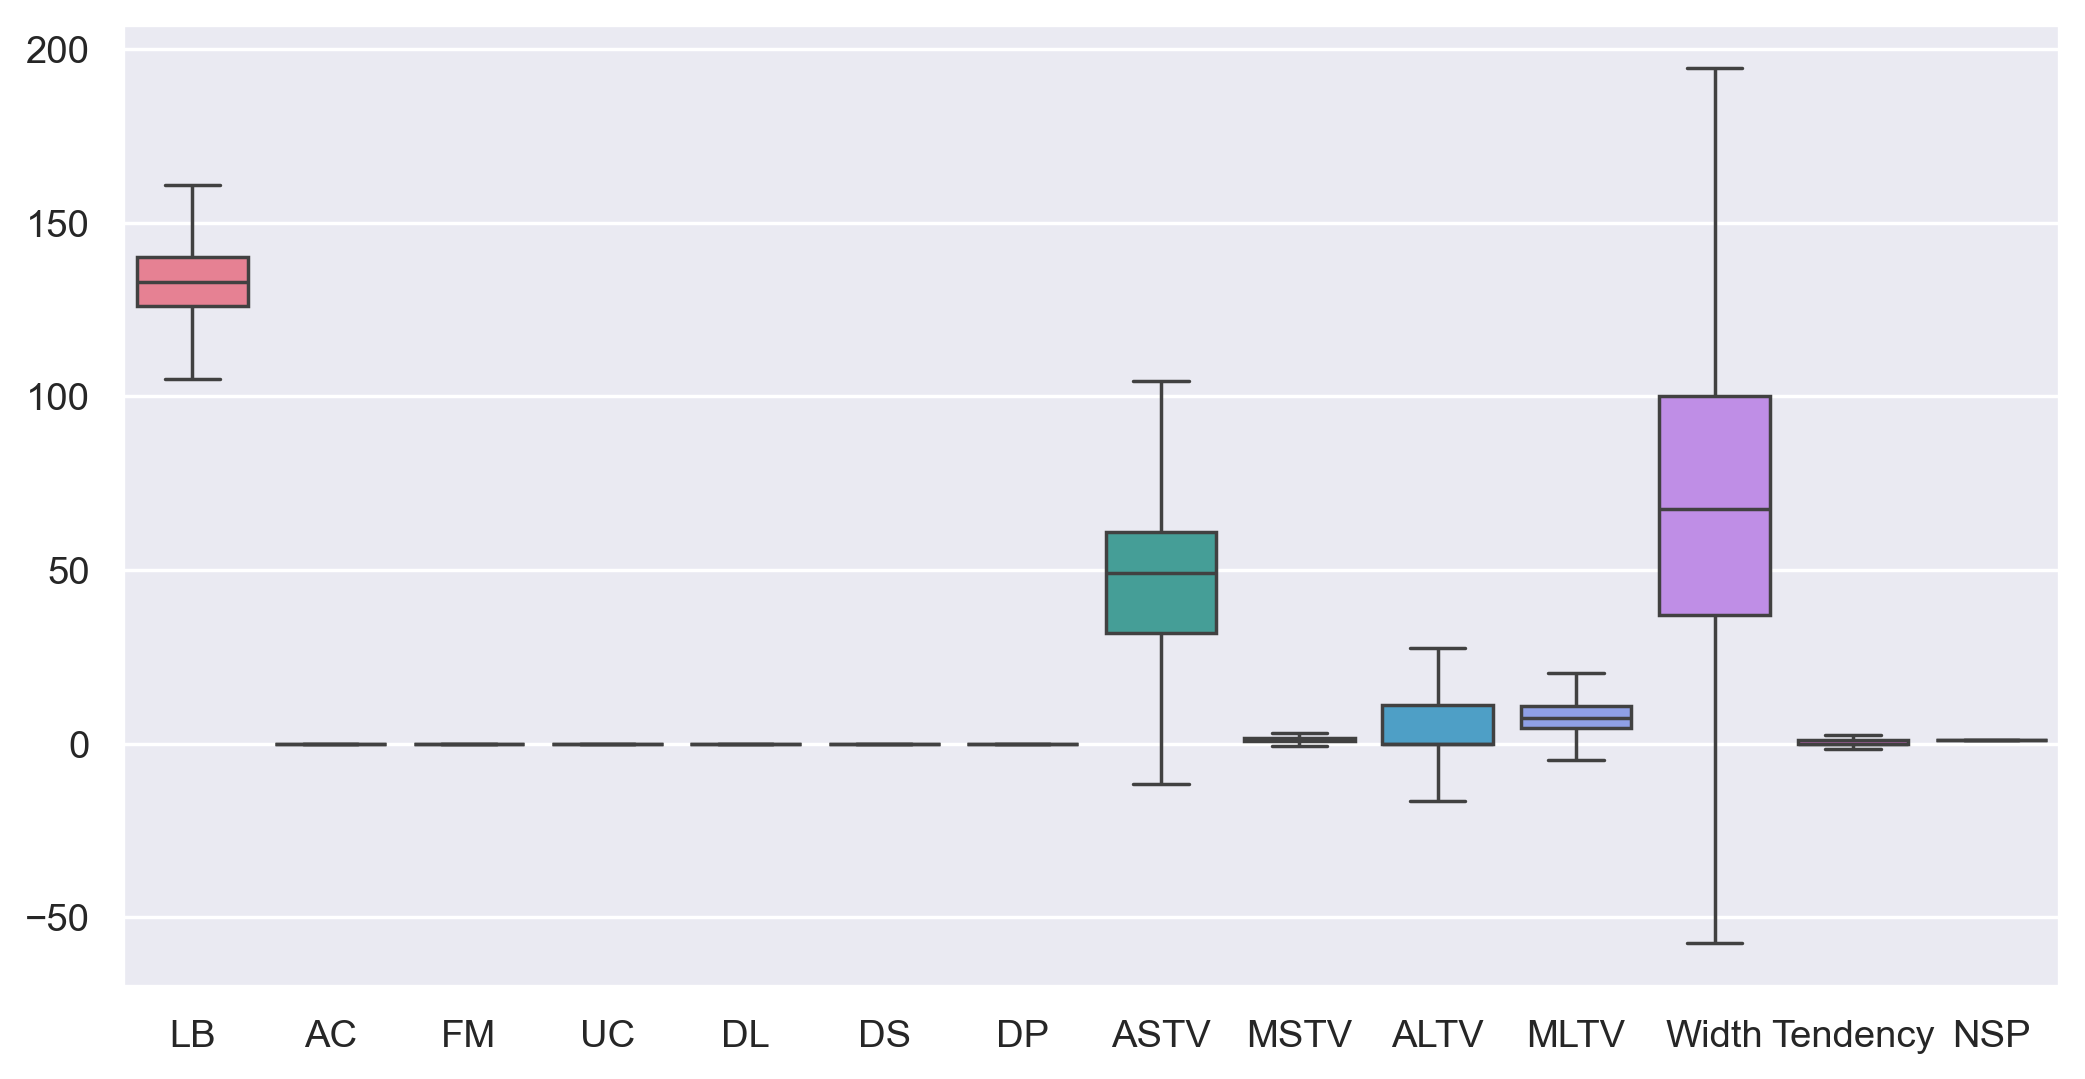

In [16]:
# Plotting boxplot after removing outliers.
sns.boxplot(df)

### After removing the missing values and outliers the columns DS and DP values have become zero which can be deleted as these columns won't help in training the models.

### Droping irrelevant columns

In [17]:
df['DS'].value_counts()

DS
0.0    2103
Name: count, dtype: int64

In [18]:
df['DP'].value_counts()

DP
0.0    2103
Name: count, dtype: int64

In [19]:
df.drop(columns=['DS','DP'], inplace=True)

In [20]:
df

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,73.0,0.5,27.5,2.40,64.0,0.999926,1.0
1,132.000000,0.006380,0.000000,0.006380,0.003190,17.0,2.1,0.0,10.40,130.0,0.000000,1.0
2,133.000000,0.003322,0.000000,0.008306,0.003322,16.0,2.1,0.0,13.40,130.0,0.000000,1.0
3,134.000000,0.002561,0.000000,0.007742,0.002561,16.0,2.4,0.0,20.35,117.0,1.000000,1.0
4,131.948232,0.006515,0.000000,0.008143,0.000000,16.0,2.4,0.0,19.90,117.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.006398,0.007426,0.000000,79.0,0.2,25.0,7.20,40.0,0.000000,1.0
2122,140.000000,0.000775,0.000000,0.006979,0.000000,78.0,0.4,22.0,7.10,66.0,1.000000,1.0
2123,140.000000,0.000980,0.000000,0.006863,0.000000,79.0,0.4,20.0,6.10,67.0,1.000000,1.0
2124,140.000000,0.000679,0.000000,0.006110,0.000000,78.0,0.4,27.0,7.00,66.0,1.000000,1.0


In [21]:
df.shape

(2103, 12)

In [22]:
# Adding Interquartile range values in the describe table to show complete statistics summary in one table

stats_summary=df.describe()
IQR ={}
for i in df.columns:
    IQR[i]=df[i].quantile(0.75)- df[i].quantile(0.25)
IQR_df =pd.DataFrame(IQR,index=['IQR'])
stats_summary=pd.concat([stats_summary,IQR_df])
stats_summary

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.0
mean,133.291604,0.003144,0.001565,0.004361,0.001770,46.999304,1.301912,6.733464,8.017610,70.351685,0.319999,1.0
std,9.976211,0.003844,0.002477,0.003008,0.002675,17.633594,0.779896,10.400402,5.094192,39.773195,0.624916,0.0
min,105.000000,-0.008475,-0.003839,-0.005219,-0.004942,-11.500000,-0.800000,-16.500000,-4.850000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001838,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001631,0.000000,0.004484,0.000000,49.000000,1.200000,0.000000,7.400000,67.486468,0.000000,1.0
75%,140.000000,0.005650,0.002559,0.006543,0.003295,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.0
max,161.000000,0.014124,0.006398,0.013601,0.008237,104.500000,3.200000,27.500000,20.350000,194.500000,2.500000,1.0
IQR,14.000000,0.005650,0.002559,0.004705,0.003295,29.000000,1.000000,11.000000,6.300000,63.000000,1.000000,0.0


### Data Visualization


<Figure size 3000x2000 with 0 Axes>

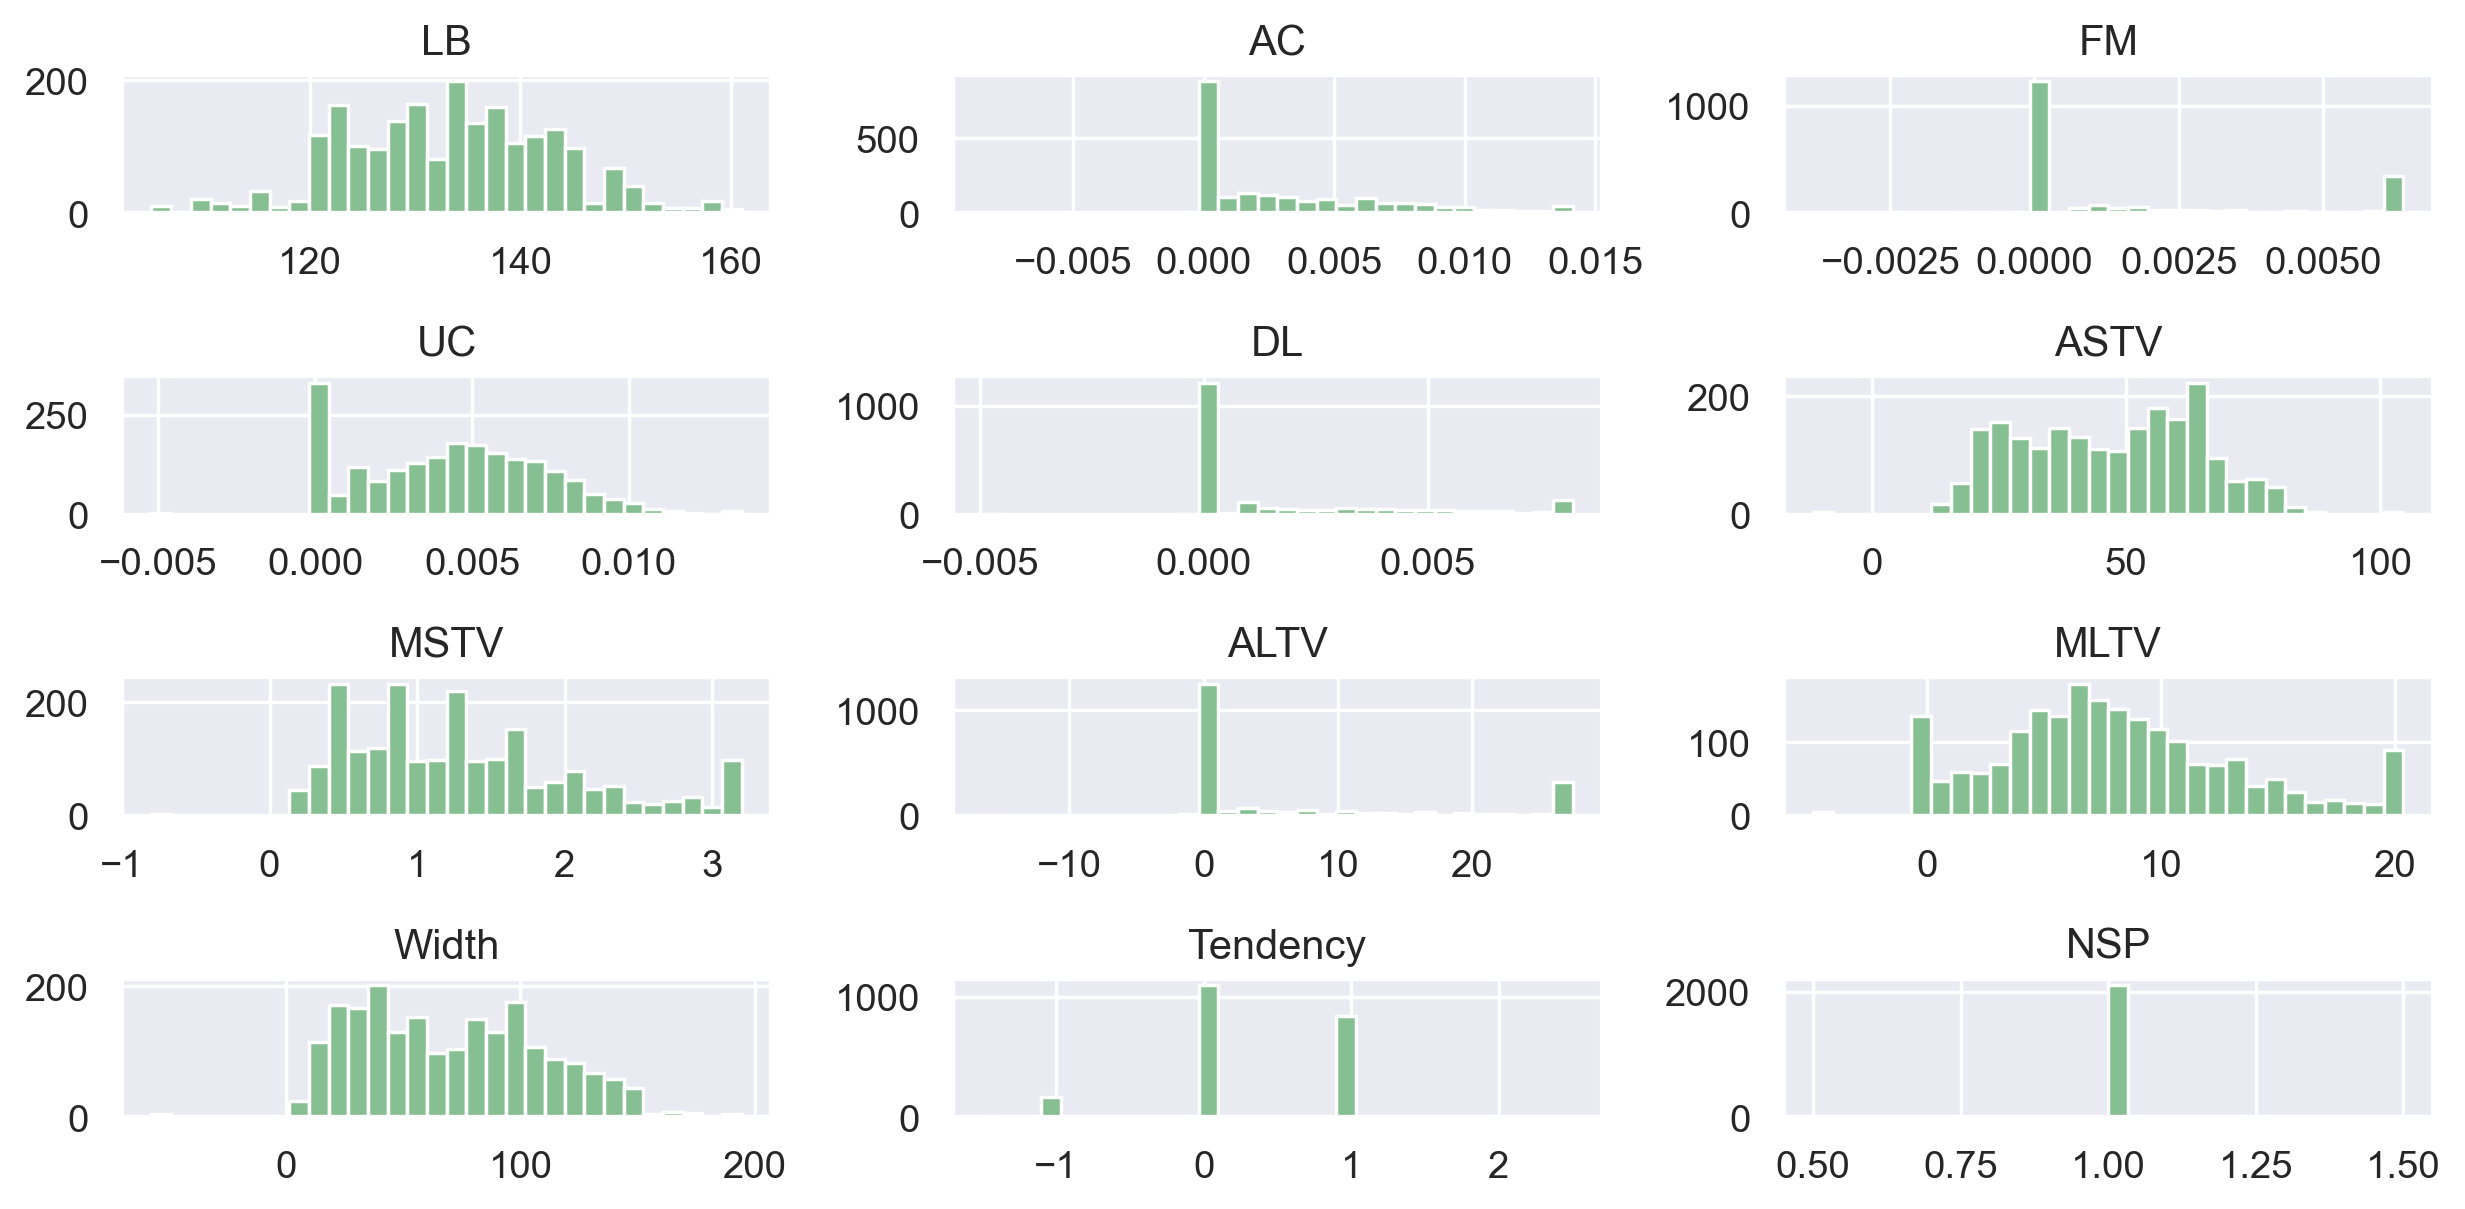

In [23]:
# Plotting histogram for all the columns.
plt.figure(figsize=(12,8))
df.hist(bins=30, color='#86bf91')
plt.tight_layout()


# Histograms are drawn to check the frequency of the variables.
# Histogram here are plotted for the variables showing their frequencies.
# Histogram describes about the data being spread that is if the values are close to mean or are deviated to left or right making it left or right skewed hitograms.
# The ideal type of histogram is bell shaped in which the data are equally spread around the mean,median, mode which is the ideal condition of bell shaped histogram.

### Gains from plotting histograms
The varibales LB, UC, ASTV, MLTV, Width are normally distributed indicating most of the data is near to the mean and not widely spread. Other variables are mostly right skewed. 

In [ ]:
# Visualization for LB - Baseline Fetal Heart Rate (FHR) using Histogram.
plt.figure(figsize=(10, 5))
sns.histplot(df['LB'],color='#86bf91', kde=True)
plt.title('Frequency distribution of Baseline Fetal Heart Rate (FHR)')
plt.xlabel('Baseline Fetal Heart Rate (FHR)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
cols = ['LB', 'AC', 'FM', 'UC', 'DL','ASTV', 'MSTV', 'ALTV', 'MLTV']

In [ ]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Creating the correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# The correlation heatmap plotted here describes the relation between the varibales.
# The correlation close to -1 indicates that there is a strong negative correlation between varibales.
# The correlation close to 1 indicates that there is a strong positive correlation between the variables.
# The correlation value equals to 0 indicates no relation.
# In the correlation heatmap that has been plotted most of the correlation are showing negative relation but not very strong as well as not very postive.

In [ ]:
# Creating violin plots for each variable
plt.figure(figsize=(10, 6))
for i, col in enumerate(cols):
    plt.subplot(3,3, i + 1)
    sns.violinplot(x=df[col],palette='rainbow')
   
plt.tight_layout()
plt.show()

# Violin plots depicts summary statistics and density of each variables.
# Violin plot is the combination of boxplot and also also plots the probability density function for the varibales on each side.
# From the plots plotted here again shows the variable which are normally distributed and others which are right skewed.

In [ ]:
#Creating a CSV file of cleaned dataset
df.to_csv('Cardiotocographic_cleaned.csv')